Author: Francisco Mena

# Let's check Multi-Arm Bandit Algorithms (MAB)

MABs are very useful when you have a set of options, each with a given reward, and probability of reward.
How do you know which one gives you the highest reward in the long term?

An example would be a set of slot machines, each with their own payrate and reward.
Or you have a set of ads you wanna show to customers, how to choose which ad to show?

You could try using AB testing, but AB testing requires you to wait til you complete the test to obtain results.
MABs are a convenient alternative. You can also see them as a Recommender System, which one do you recommend?

Let's see this example where we have 10 different ads


(data obtained from https://www.analyticsvidhya.com/blog/2018/09/reinforcement-multi-armed-bandit-scratch-python/)

In [ ]:
#Fixing the seed
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

import random
random.seed(42)
np.random.seed(42)


In [1]:

print(os.getcwd())

#Choose the path were you save the excel file
os.chdir("C:\\Users\\franc\\projects\\letstf2gpu\\MultiArmed Bandit Algorithms")

# load data
df = pd.read_csv('Ads_Optimization.csv')

print(df.head())


C:\Users\franc\projects\letstf2gpu\MultiArmed Bandit Algorithms


The data will help us represent showing an add to a client, and if they clicked (1) or not (0)

In traditional AB testing, we would show each ad to an equal number of clients, and see which ad was more successful.
Let's try to model that.

In [4]:
df.shape

#number of iterations
N = df.shape[0]
#print(N)

#number of ads
n_ads = df.shape[1]

#which ad was selected to show
ads_selected = []

#number of times each ad was clicked
ad_counts = [0] * n_ads

#sum of rewards per ad
ad_rewards = [0] * n_ads

#probability of rewards per add
prob_of_rewards = [0] * n_ads

#total rewards
total_rewards = 0

#reward per iteration
reward_per_iteration = []


#Each iteration is showing an add to a person, and we see if the person clicks or not
for ii in range(N):

    #each ad is chosen an equal number of times
    ad_chosen = ii % n_ads

    reward = df.iloc[ii,ad_chosen]
    ad_rewards[ad_chosen] += reward
    ad_counts[ad_chosen] += 1
    prob_of_rewards[ad_chosen] = prob_of_rewards[ad_chosen] + (1/ad_counts[ad_chosen])*(reward - prob_of_rewards[ad_chosen])

    total_rewards += reward
    reward_per_iteration.append( total_rewards/(ii+1) )

Text(0, 0.5, 'Number of times each Ad was chosen')

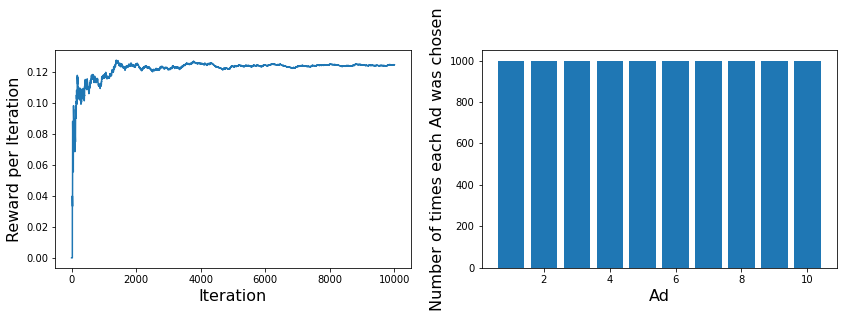

In [5]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)

The plot on the left shows that using this method, i.e., showing each ad an equal number of times,
we get a reward of 0.12, that is, 12% of the time we get a click.


In [6]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards])
print('\n')
print('Total return:')
print(total_rewards)

Return rates for each ad:
['18%', '14%', '7%', '13%', '28%', '1%', '10%', '20%', '8%', '5%']


Total return:
1248


And we found that the 5th ad has the highest return, it's the most popular ad.
In this experiment, in total, we got 1,248 clicks. Considering that we iterated 10,000 times,
it's a fairly low return, even though we did find the best ad.

## MultiArm Bandit
### Upper Confidence Bound (UCB) Algorithm

Let's try choosing an ad to show to the clients in a more educated manner.
The UCB algorithm chooses the option with highest combination of reward and uncertainty,
until we are certain about which ad has the highest reward. Let's implement it

In [7]:
#which ad was selected to show
ads_selected_ucb = []

#number of times each ad was clicked
ad_counts_ucb = [0] * n_ads

#sum of rewards per ad
ad_rewards_ucb = [0] * n_ads

#probability of rewards per add
prob_of_rewards_ucb = [0] * n_ads

#total rewards
total_rewards_ucb = 0

#reward per iteration
reward_per_iteration_ucb = []


#Each iteration is showing an add to a person, and we see if the person clicks or not
for ii in range(N):

    #First we need to choose each Ad at least once
    if ii < n_ads:
        ad_chosen = ii
    else:
        U = np.sqrt( np.log(ii)/ad_counts_ucb) #uncertainty
        ad_chosen = np.argmax(prob_of_rewards_ucb + U)

    reward = df.iloc[ii,ad_chosen]
    ad_rewards_ucb[ad_chosen] += reward
    ad_counts_ucb[ad_chosen] += 1
    prob_of_rewards_ucb[ad_chosen] = prob_of_rewards_ucb[ad_chosen] +\
                                     (1/ad_counts_ucb[ad_chosen])*(reward - prob_of_rewards_ucb[ad_chosen])

    total_rewards_ucb += reward
    reward_per_iteration_ucb.append( total_rewards_ucb/(ii+1) )

Text(0.5, 1.0, 'UCB')

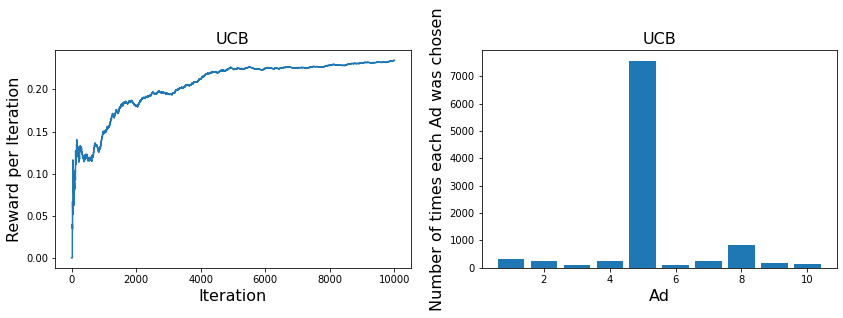

In [8]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_ucb, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("UCB", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_ucb)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("UCB", fontsize = 16)

In [9]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_ucb])
print('\n')
print('Total return:')
print(total_rewards_ucb)

Return rates for each ad:
['13%', '11%', '2%', '11%', '27%', '1%', '11%', '20%', '7%', '5%']


Total return:
2346


As the results show, the reward per iteration is much higher now, 23% vs. 12% for the previous method.
The bar plot shows that we tried each ad a few times, but once we found the best ad all we stack with it.
That's why the total return is so much higher! We pretty much doubled the total number of clicks :)

### MAB Epsilon-Greedy Algorithm

There are different ways we can choose the ad to show the client.
In the epsilon greedy algorithm, we choose a random Ad with probability epsilon,
and choose the Ad with highest reward with probability 1 - epsilon.

The probability of being random (epsilon) decreases with a given decay rate
to represent the fact that with each iteration you learn more about which Ad is the best.

In [29]:
#PARAMETERS IMPORTANT FOR EPSILON GREEDY
def MAB_epsilongreedy(epsilon=0.10, decay_rate=0.9, decay_interval=500):
    np.random.seed(42)

    #which ad was selected to show
    ads_selected_egreedy = []

    #number of times each ad was clicked
    ad_counts_egreedy = [0] * n_ads

    #sum of rewards per ad
    ad_rewards_egreedy = [0] * n_ads

    #probability of rewards per add
    prob_of_rewards_egreedy = [0] * n_ads

    #total rewards
    total_rewards_egreedy = 0

    #reward per iteration
    reward_per_iteration_egreedy = []

    #Each iteration is showing an add to a person, and we see if the person clicks or not
    for ii in range(N):

        #Choose ad randomly if random number < epsilon, else ad with highest reward
        ad_chosen = np.random.choice(n_ads) if np.random.random() < epsilon else np.argmax(prob_of_rewards_egreedy)

        reward = df.iloc[ii,ad_chosen]
        ad_rewards_egreedy[ad_chosen] += reward
        ad_counts_egreedy[ad_chosen] += 1
        prob_of_rewards_egreedy[ad_chosen] = prob_of_rewards_egreedy[ad_chosen] +\
                                         (1/ad_counts_egreedy[ad_chosen])*(reward - prob_of_rewards_egreedy[ad_chosen])

        total_rewards_egreedy += reward
        reward_per_iteration_egreedy.append( total_rewards_egreedy/(ii+1) )

        #Every multiple of decay_interval we lower epsilon
        if ii % decay_interval == 0:
            epsilon = epsilon * decay_rate

    return reward_per_iteration_egreedy, ad_counts_egreedy, prob_of_rewards_egreedy, total_rewards_egreedy


In [30]:
reward_per_iteration_egreedy, ad_counts_egreedy, prob_of_rewards_egreedy, total_rewards_egreedy = MAB_epsilongreedy()

Text(0.5, 1.0, 'UCB')

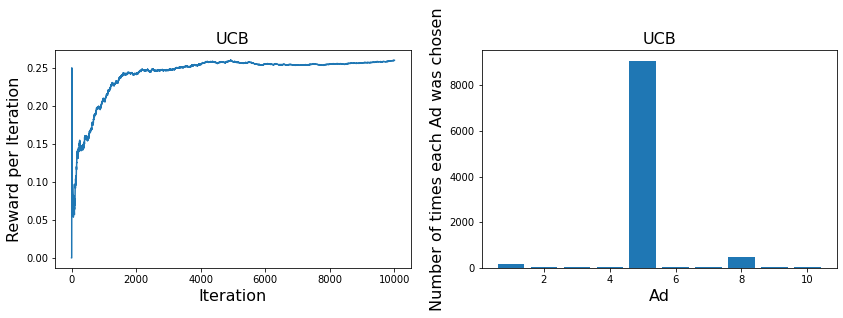

In [31]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_egreedy, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("Epsilon Greedy", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_egreedy)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("Epsilon Greedy", fontsize = 16)

In [32]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_egreedy])
print('\n')
print('Total return:')
print(total_rewards_egreedy)

Return rates for each ad:
['15%', '10%', '6%', '10%', '27%', '0%', '3%', '21%', '6%', '11%']


Total return:
2600


The algorithm found the best add, and we've been able to increase the total reward by about 300 clicks, and the reward per iteration by about 2%.
This shows that the epsilon-greedy algorithm can be as good as UCB, however it highly depends on the decay rate, decay interval, and  epsilon values we choose.
Let's repeat the experiment with different values.

In [78]:
#A very slow decay and more exploration
eps = 0.3
decay_rte = 0.99
decay_int = 800
reward_per_iteration_egreedy, ad_counts_egreedy, prob_of_rewards_egreedy, total_rewards_egreedy = MAB_epsilongreedy(epsilon=eps,
                                                                                                                    decay_rate=decay_rte,
                                                                                                                    decay_interval=decay_int)

Text(0.5, 1.0, 'Epsilon Greedy')

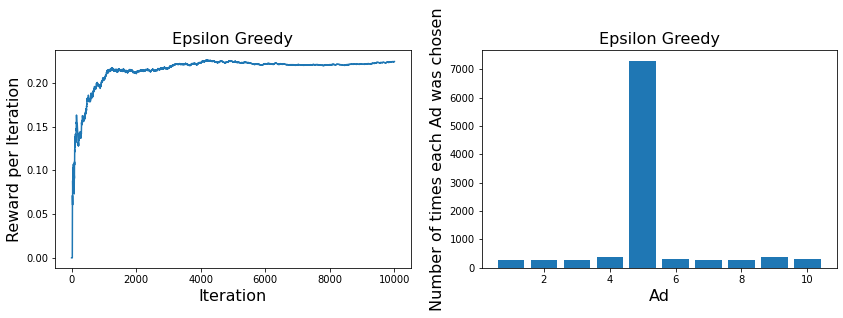

In [83]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_egreedy, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("Epsilon Greedy", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_egreedy)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("Epsilon Greedy", fontsize = 16)

In [80]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_egreedy])
print('\n')
print('Total return:')
print(total_rewards_egreedy)

Return rates for each ad:
['14%', '12%', '6%', '15%', '27%', '1%', '9%', '19%', '15%', '6%']


Total return:
2247


Since we're doing more exploration (higher epsilon and slower decay), we obtain a lower return even though we found the best ad.


### MAB Softmax/Boltzmann

In epsilon-greedy we choose a random Ad with probability epsilon, otherwise we choose the best so far.
It would be better explore not randomly, but with a given probability. In the Softmax/Boltzmann MBA algorithm,
we choose each Ad with a probability proportional to its average reward.

In [91]:
def MAB_softmax(tau= 0.5):
    np.random.seed(42)

    #which ad was selected to show
    ads_selected_softmax = []

    #number of times each ad was clicked
    ad_counts_softmax = [0] * n_ads

    #sum of rewards per ad
    ad_rewards_softmax = [0] * n_ads

    #probability of rewards per add
    prob_of_rewards_softmax = np.zeros(n_ads)

    #total rewards
    total_rewards_softmax = 0

    #reward per iteration
    reward_per_iteration_softmax = []

    #Each iteration is showing an add to a person, and we see if the person clicks or not
    for ii in range(N):

        action_probas = np.exp(prob_of_rewards_softmax/tau) / np.sum(np.exp(prob_of_rewards_softmax/tau))
        #We choose a given Ad with a probability given by the boltzmann dist.
        ad_chosen = np.random.choice(n_ads, p=action_probas)

        reward = df.iloc[ii,ad_chosen]
        ad_rewards_softmax[ad_chosen] += reward
        ad_counts_softmax[ad_chosen] += 1
        prob_of_rewards_softmax[ad_chosen] = prob_of_rewards_softmax[ad_chosen] +\
                                         (1/ad_counts_softmax[ad_chosen])*(reward - prob_of_rewards_softmax[ad_chosen])

        total_rewards_softmax += reward
        reward_per_iteration_softmax.append( total_rewards_softmax/(ii+1) )


    return reward_per_iteration_softmax, ad_counts_softmax, prob_of_rewards_softmax, total_rewards_softmax

In [92]:
reward_per_iteration_softmax, ad_counts_softmax, prob_of_rewards_sofmax, total_rewards_softmax = MAB_softmax()

Text(0.5, 1.0, 'Softmax')

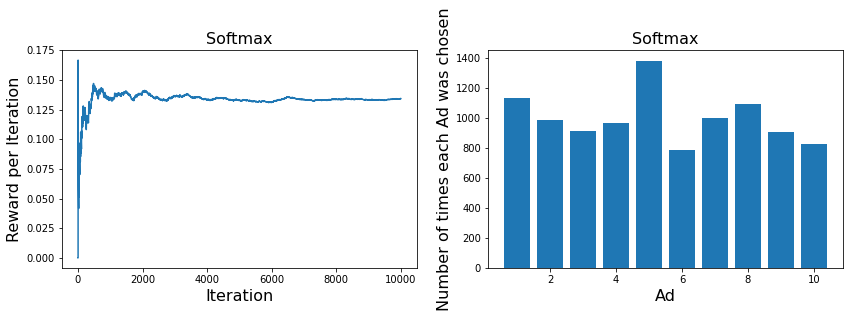

In [93]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_softmax, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("Softmax", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_softmax)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("Softmax", fontsize = 16)

In [94]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_egreedy])
print('\n')
print('Total return:')
print(total_rewards_softmax)

Return rates for each ad:
['14%', '12%', '6%', '15%', '27%', '1%', '9%', '19%', '15%', '6%']


Total return:
1343


The parameter tau, also called "Temperature" sets how much weight we give to the probability of choosing the best Ad.
With tau = 0.5 we obtained fairly poor return, similar to the random choice, even though we still found the best Ad
Let's try with other tau values.

Text(0.5, 1.0, 'Softmax')

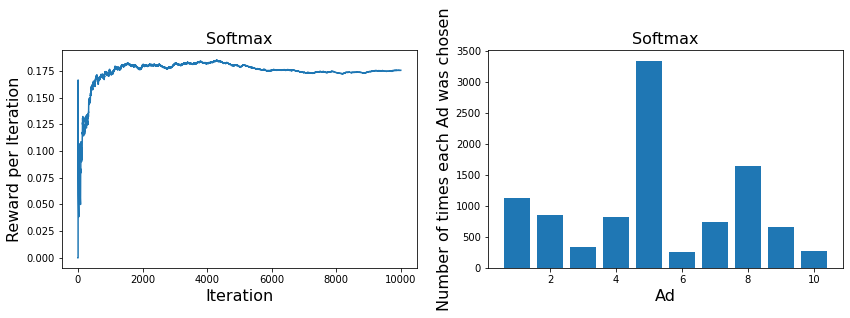

In [100]:
reward_per_iteration_softmax, ad_counts_softmax, prob_of_rewards_sofmax, total_rewards_softmax = MAB_softmax(tau= 0.1)

fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_softmax, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("Softmax", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_softmax)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("Softmax", fontsize = 16)

In [101]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_egreedy])
print('\n')
print('Total return:')
print(total_rewards_softmax)

Return rates for each ad:
['14%', '12%', '6%', '15%', '27%', '1%', '9%', '19%', '15%', '6%']


Total return:
1758


With a lower value of tau we obtain a better return, but still less optimal than the previous algorithms.
One advantage we can see in the Softmax approach is that it explores more of the other options, avoiding sticking with a sub-optimal choice.

### MAB Thompson Sampling

In this algorithm, since we have two outcomes (click or not click), we assume the probability of reward follows a Bernoulli distribution, with Beta as a prior.
With this assumption we calculate the probability distribution for each Ad, and then choose the Ad with highest prob.
Let's check it:

In [144]:
def MAB_thompson():
    #np.random.seed(2077)

    #which ad was selected to show
    ads_selected_thompson = []

    #number of times each ad was clicked
    ad_counts_thompson = np.zeros(n_ads)

    #sum of rewards per ad
    ad_rewards_thompson = np.zeros(n_ads)

    #probability of rewards per add
    prob_of_rewards_thompson = np.zeros(n_ads)

    #total rewards
    total_rewards_thompson = 0

    #reward per iteration
    reward_per_iteration_thompson = []

    #Each iteration is showing an add to a person, and we see if the person clicks or not
    for ii in range(N):


        action_probas = np.random.beta(a=2+ad_rewards_thompson, b=2+ ad_counts_thompson-ad_counts_thompson)

        #We choose a given Ad with highest probability
        ad_chosen = np.argmax(action_probas)

        reward = df.iloc[ii,ad_chosen]
        ad_rewards_thompson[ad_chosen] += reward
        ad_counts_thompson[ad_chosen] += 1
        prob_of_rewards_thompson[ad_chosen] = prob_of_rewards_thompson[ad_chosen] +\
                                         (1/ad_counts_thompson[ad_chosen])*(reward - prob_of_rewards_thompson[ad_chosen])

        total_rewards_thompson += reward
        reward_per_iteration_thompson.append( total_rewards_thompson/(ii+1) )


    return reward_per_iteration_thompson, ad_counts_thompson, prob_of_rewards_thompson, total_rewards_thompson

In [151]:
reward_per_iteration_thompson, ad_counts_thompson, prob_of_rewards_thompson, total_rewards_thompson = MAB_thompson()

Text(0.5, 1.0, 'Thompson')

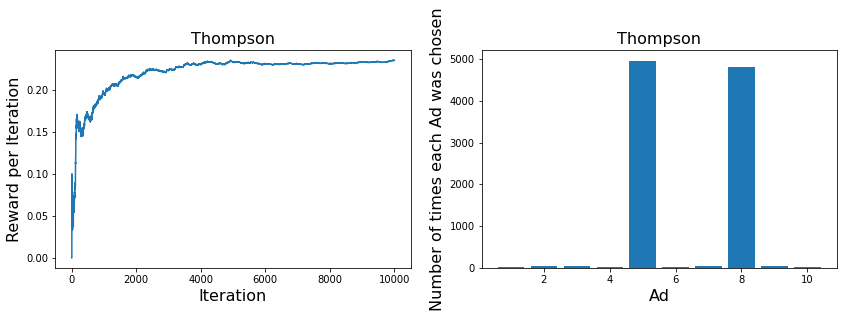

In [152]:
fig = plt.figure(figsize = (14,4))

ax1 = fig.add_subplot(121)
ax1.plot(reward_per_iteration_thompson, label="cummulative rewards")
ax1.set_xlabel("Iteration", fontsize = 16)
ax1.set_ylabel("Reward per Iteration", fontsize = 16)
ax1.set_title("Thompson", fontsize = 16)
#ax1.set_ylim(0,0.5)


ax2 = fig.add_subplot(122)
ax2.bar([i for i in range(1,len(ad_counts)+1)], ad_counts_thompson)
ax2.set_xlabel("Ad", fontsize = 16)
ax2.set_ylabel("Number of times each Ad was chosen", fontsize = 16)
ax2.set_title("Thompson", fontsize = 16)


In [153]:
print("Return rates for each ad:")
print(["{:.0f}%".format(x*100) for x in prob_of_rewards_egreedy])
print('\n')
print('Total return:')
print(total_rewards_thompson)

Return rates for each ad:
['14%', '12%', '6%', '15%', '27%', '1%', '9%', '19%', '15%', '6%']


Total return:
2353


Here's an interesting case were the algorithm was not sure between choosing Ad #5 or #8.
Eventually found the right Ad, although it translates in lower total reward.

## Conclusion

We've seen how useful Multi-Arm Bandit algorithms can be, in comparison to traditional methods of AB testing or recommending among different options.
They're simple to implement and quite fast to run. You can choose the right algorithm depending on your specific problem, but as we've seen
most of them give fairly good return.

Good luck!
